Finished Robert


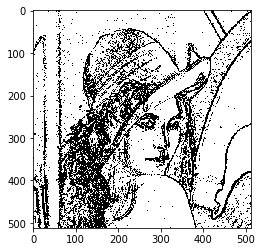

Finished Prewitt


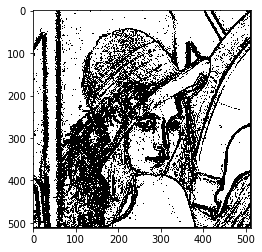

Finished Sobel


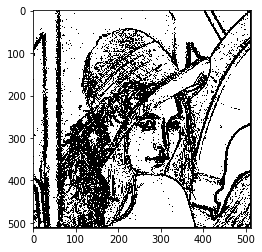

Finished Frei Chen


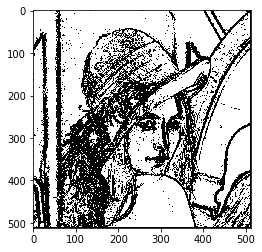

Finished Krisch


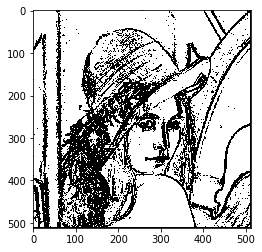

Finished Robinson


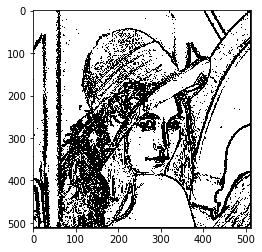

Finished Neviatia Babu


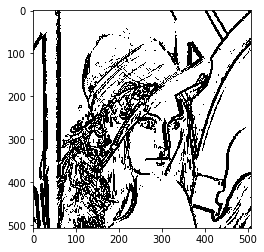

In [17]:
import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np

####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

# a: part of image, b: conv kernel
def conv(a, b):
    
    ra, ca = a.shape
    rb, cb = b.shape
    res = 0
    for i in range(ra):
        for j in range(ca):
            if ra - i - 1 >= 0 and ra - i - 1 < rb \
            and ca - j - 1 >= 0 and ca - j - 1 < cb:
                res += a[i, j] * b[ra - i - 1, ca - j - 1]
    return res
            
def Robert(img_in):
    k1 = np.array([
        [1, 0], 
        [0, -1]
    ])
    k2 = np.array([
        [0, 1], 
        [-1, 0]
    ])
    
    gx = np.zeros(img_in.shape, dtype='int32')
    gy = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            gx[i, j] = conv(img_in[i:i + 2, j:j + 2], k1)
            gy[i, j] = conv(img_in[i:i + 2, j:j + 2], k2)
    
    return np.sqrt(gx ** 2 + gy ** 2)

def Prewitt(img_in):
    k1 = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    
    k2 = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    
    gx = np.zeros(img_in.shape, dtype='int32')
    gy = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            gx[i, j] = conv(img_in[i:i + 3, j:j + 3], k1)
            gy[i, j] = conv(img_in[i:i + 3, j:j + 3], k2)
            
    return np.sqrt(gx ** 2 + gy ** 2)

def Sobel(img_in):
    k1 = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    k2 = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    
    gx = np.zeros(img_in.shape, dtype='int32')
    gy = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            gx[i, j] = conv(img_in[i:i + 3, j:j + 3], k1)
            gy[i, j] = conv(img_in[i:i + 3, j:j + 3], k2)
            
    return np.sqrt(gx ** 2 + gy ** 2)

def Frei_Chen(img_in):
    k1 = np.array([
        [-1, -np.sqrt(2), -1],
        [0, 0, 0],
        [1, np.sqrt(2), 1]
    ])
    k2 = np.array([
        [-1, 0, 1],
        [-np.sqrt(2), 0, np.sqrt(2)],
        [-1, 0, 1]
    ])
    
    gx = np.zeros(img_in.shape, dtype='int32')
    gy = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            gx[i, j] = conv(img_in[i:i + 3, j:j + 3], k1)
            gy[i, j] = conv(img_in[i:i + 3, j:j + 3], k2)
            
    return np.sqrt(gx ** 2 + gy ** 2)

def Krisch(img_in):
    k0 = np.array([
        [-3, -3, 5],
        [-3, 0, 5],
        [-3, -3, 5]
    ])
    k1 = np.array([
        [-3, 5, 5],
        [-3, 0, 5],
        [-3, -3, -3]
    ])
    k2 = np.array([
        [5, 5, 5],
        [-3, 0, -3],
        [-3, -3, -3]
    ])
    k3 = np.array([
        [5, 5, -3],
        [5, 0, -3],
        [-3, -3, -3]
    ])
    k4 = np.array([
        [5, -3, -3],
        [5, 0, -3],
        [5, -3, -3]
    ])
    k5 = np.array([
        [-3, -3, -3],
        [5, 0, -3],
        [5, 5, -3]
    ])
    k6 = np.array([
        [-3, -3, -3],
        [-3, 0, -3],
        [5, 5, 5]
    ])
    k7 = np.array([
        [-3, -3, -3],
        [-3, 0, 5],
        [-3, 5, 5]
    ])
    
    g = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            r0 = conv(img_in[i:i + 3, j:j + 3], k0)
            r1 = conv(img_in[i:i + 3, j:j + 3], k1)
            r2 = conv(img_in[i:i + 3, j:j + 3], k2)
            r3 = conv(img_in[i:i + 3, j:j + 3], k3)
            r4 = conv(img_in[i:i + 3, j:j + 3], k4)
            r5 = conv(img_in[i:i + 3, j:j + 3], k5)
            r6 = conv(img_in[i:i + 3, j:j + 3], k6)
            r7 = conv(img_in[i:i + 3, j:j + 3], k7)
            r0 = conv(img_in[i:i + 3, j:j + 3], k0)
            g[i, j] = np.max([r0, r1, r2, r3, r4, r5, r6, r7])
            
    return g

def Robinson(img_in):
    k0 = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    k1 = np.array([
        [0, 1, 2],
        [-1, 0, 1],
        [-2, -1, 0]
    ])
    k2 = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    k3 = np.array([
        [2, 1, 0],
        [1, 0, -1],
        [0, -1, -2]
    ])
    k4 = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    k5 = np.array([
        [0, -1, -2],
        [1, 0, -1],
        [2, 1, 0]
    ])
    k6 = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    k7 = np.array([
        [-2, -1, 0],
        [-1, 0, 1],
        [0, 1, 2]
    ])
    
    g = np.zeros(img_in.shape, dtype='int32')
    
    row, col = img_in.shape
    for i in range(row):
        for j in range(col):
            r0 = conv(img_in[i:i + 3, j:j + 3], k0)
            r1 = conv(img_in[i:i + 3, j:j + 3], k1)
            r2 = conv(img_in[i:i + 3, j:j + 3], k2)
            r3 = conv(img_in[i:i + 3, j:j + 3], k3)
            r4 = conv(img_in[i:i + 3, j:j + 3], k4)
            r5 = conv(img_in[i:i + 3, j:j + 3], k5)
            r6 = conv(img_in[i:i + 3, j:j + 3], k6)
            r7 = conv(img_in[i:i + 3, j:j + 3], k7)
            g[i, j] = np.max([r0, r1, r2, r3, r4, r5, r6, r7])
            
    return g

def Neviatia_Babu(img_in):
    k0 = np.array([
        [100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100],
        [0, 0, 0, 0, 0],
        [-100, -100, -100, -100, -100],
        [-100, -100, -100, -100, -100],
    ])
    k1 = np.array([
        [100, 100, 100, 100, 100],
        [100, 100, 100, 78, -32],
        [100, 92, 0, -92, -100],
        [32, -78, -100, -100, -100],
        [-100, -100, -100, -100, -100]
    ])
    k2 = np.array([
        [100, 100, 100, 32, -100],
        [100, 100, 92, -78, -100],
        [100, 100, 0, -100, -100],
        [100, 78, -92, -100, -100],
        [100, -32, -100, -100, -100]
    ])
    k3 = np.array([
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100]
    ])
    k4 = np.array([
        [-100, 32, 100, 100, 100],
        [-100, -78, 92, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, -92, 78, 100],
        [-100, -100, -100, -32, 100]
    ])
    k5 = np.array([
        [100, 100, 100, 100, 100],
        [-32, 78, 100, 100, 100],
        [-100, -92, 0, 92, 100],
        [-100, -100, -100, -78, 32],
        [-100, -100, -100, -100, -100]
    ])
    
    g = np.zeros((img_in.shape[0] - 5, img_in.shape[0] - 5), dtype='int32')
    
    row, col = g.shape
    for i in range(row):
        for j in range(col):
            r0 = np.sum(img_in[i:i + 5, j:j + 5] * k0)
            r1 = np.sum(img_in[i:i + 5, j:j + 5] * k1)
            r2 = np.sum(img_in[i:i + 5, j:j + 5] * k2)
            r3 = np.sum(img_in[i:i + 5, j:j + 5] * k3)
            r4 = np.sum(img_in[i:i + 5, j:j + 5] * k4)
            r5 = np.sum(img_in[i:i + 5, j:j + 5] * k5)
            g[i, j] = np.max([r0, r1, r2, r3, r4, r5])
            
    return g

def main():
    img_Robert = (Robert(img) < 12) * 255
    print('Finished Robert')
    plt.imshow(img_Robert, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Robert.png', img_Robert)
    
    img_Prewitt = (Prewitt(img) < 24) * 255
    print('Finished Prewitt')
    plt.imshow(img_Prewitt, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Prewitt.png', img_Prewitt)
    
    img_Sobel = (Sobel(img) < 38) * 255 
    print('Finished Sobel')
    plt.imshow(img_Sobel, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Sobel.png', img_Sobel)
    
    img_Frei_Chen = (Frei_Chen(img) < 30) * 255
    print('Finished Frei Chen')
    plt.imshow(img_Frei_Chen, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Frei_Chen.png', img_Frei_Chen)
    
    img_Krisch = (Krisch(img) < 135) * 255
    print('Finished Krisch')
    plt.imshow(img_Krisch, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Kirsch.png', img_Krisch)
    
    img_Robinson = (Robinson(img) < 43) * 255
    print('Finished Robinson')
    plt.imshow(img_Robinson, cmap='gray')
    plt.show()
    cv2.imwrite('lena_Robinson.png', img_Robinson)
    
    img_NB = (Neviatia_Babu(img) < 12500) * 255
    print('Finished Neviatia Babu')
    plt.imshow(img_NB, cmap='gray')
    plt.show()
    cv2.imwrite('lena_NB.png', img_NB)
    
if __name__ == '__main__':
    main()